# Введение в искусственные нейронные сети
# Домашнее задание 2. Keras

### Подготовка

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [6]:
(train_imagef,train_labelf), (test_imagef, test_labelf) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [36]:
set(train_labelf) # у нас 10 классов

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [24]:
# Normalize the images.
train_imagef = (train_imagef / 127) - 1
test_imagef = (test_imagef / 127) - 1

# Flatten the images.
train_images = train_imagef.reshape((-1, 784))
test_images = test_imagef.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [39]:
y_t = to_categorical(train_labelf)
y_tt = to_categorical(test_labelf)

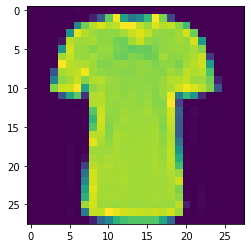

0


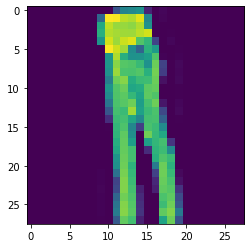

1


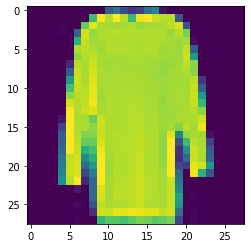

2


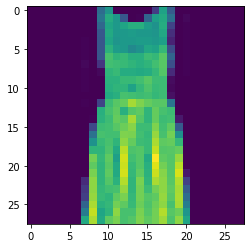

3


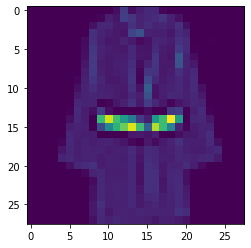

4


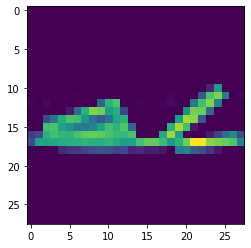

5


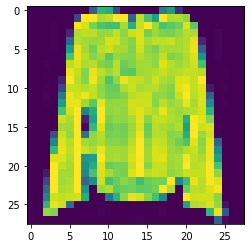

6


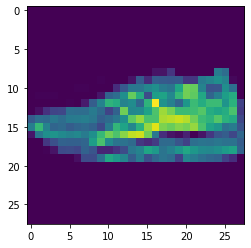

7


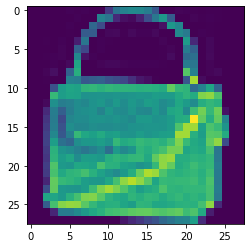

8


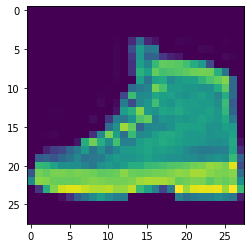

9


In [166]:
# посмотрим на объекты глазами
for class_img in list(set(train_labelf)):
    index = np.where(train_labelf == class_img)[0][33]
    plt.imshow(train_imagef[index])
    plt.show()
    print(train_labelf[index])

In [173]:
# присвоим классам понятные имена
classes = ['футболки (0)', 'штаны (1)', 'свитеры (2)', 'платья (3)', 'верхняя одежда (4)', 'босоножки (5)', 
           'рубашки (6)', 'кроссовки (7)', 'сумки (8)', 'зимняя обувь (9)']

## Практическое задание

Используем набор примеров fashion-MNIST

### 1.  Опишите - какой результат получен в нейросети в зависимости от:
###  - числа нейронов в слое (для 2-х слойной сети), 
###  - фиксируйте для тренировочного и тестового набора метрики accuracy.

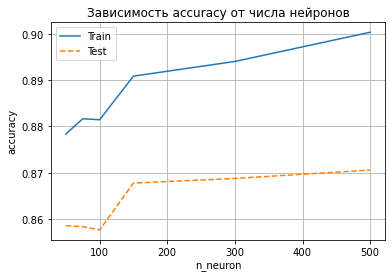

In [80]:
results = {'n_neuron': [], 'train_acc': [], 'test_acc': []}
for n_neuron in [50, 75, 100, 150, 300, 500]:
    # Build the model.
    model = Sequential([
      Dense(n_neuron, activation='relu', input_shape=(784,)),
      Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
    ])

    # Compile the model.
    model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    
    model.fit( 
      train_images,
      to_categorical(train_labelf),
      epochs=5,
      batch_size=256, validation_split=0.2, verbose=0
    )

    # Evaluate the model.
    
    train_result = model.evaluate(
                   train_images,
                   to_categorical(train_labelf),
                   verbose=0
                   )[1]
        
    test_result = model.evaluate(
                  test_images,
                  to_categorical(test_labelf),
                  verbose=0
                  )[1]
    
    results['n_neuron'].append(n_neuron)
    results['train_acc'].append(train_result)
    results['test_acc'].append(test_result)
    
plt.plot(results['n_neuron'], results['train_acc'], '-', label = f'Train')
plt.plot(results['n_neuron'], results['test_acc'], '--', label = f'Test')
    
plt.legend()
plt.grid('On')
plt.title('Зависимость accuracy от числа нейронов')
plt.xlabel('n_neuron')
plt.ylabel('accuracy')
plt.show()

#### Метрика постепенно увеличивается при увеличении числа нейронов, однако на большом числе нейронов (>300 начинает наблюдаться переобучение).

### 1.  Опишите - какой результата получен в нейросети в зависимости от:
###  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).
###  - фиксируйте для тренировочного и тестового набора метрики accuracy.

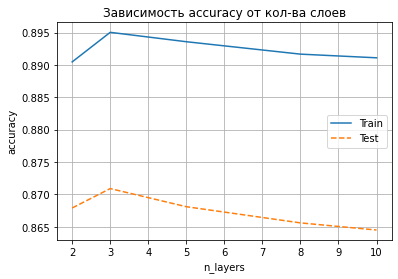

In [87]:
results = {'n_layers': [], 'train_acc': [], 'test_acc': []}
for n_layer in [2, 3, 5, 8, 10]:
    # Build the model.
    model = Sequential([
      Dense(150, activation='relu', input_shape=(784,))
    ])
    
    for layer in range(n_layer - 2):
        model.add(Dense(100, activation='tanh')) # скрытый слой с 100 нейронов
    model.add(Dense(10, activation='softmax')) # выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
    # Compile the model.
    model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    
    model.fit( 
      train_images,
      to_categorical(train_labelf),
      epochs=5,
      batch_size=256, validation_split=0.2, verbose=0
    )

    # Evaluate the model.
    
    train_result = model.evaluate(
                   train_images,
                   to_categorical(train_labelf),
                   verbose=0
                   )[1]
        
    test_result = model.evaluate(
                  test_images,
                  to_categorical(test_labelf),
                  verbose=0
                  )[1]
    
    results['n_layers'].append(n_layer)
    results['train_acc'].append(train_result)
    results['test_acc'].append(test_result)
    
plt.plot(results['n_layers'], results['train_acc'], '-', label = f'Train')
plt.plot(results['n_layers'], results['test_acc'], '--', label = f'Test')
    
plt.legend()
plt.grid('On')
plt.title('Зависимость accuracy от кол-ва слоев')
plt.xlabel('n_layers')
plt.ylabel('accuracy')
plt.show()

#### Явной зависимости качества от числа слоев не наблюдается, немного лучше для данной задачи (выбранных параметров) ведут себя сети с малым числом слоев (2-3).

### 2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

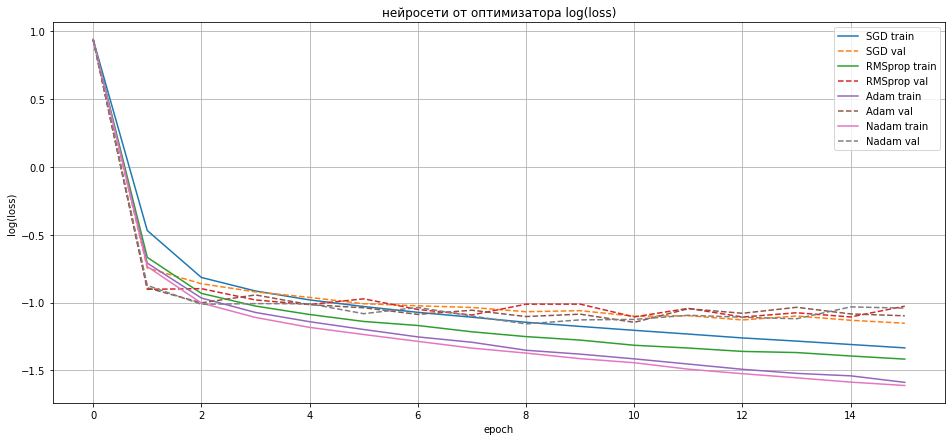

In [91]:
# создаем модель model
model = Sequential([
                      Dense(150, activation='relu', input_shape=(784,)),
                      Dense(100, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])

# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводов результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы

#opt_list = [keras.optimizers.SGD( ),keras.optimizers.Adam( ),keras.optimizers.Nadam( )]
results = {'optim': [], 'train_acc': [], 'test_acc': []}
for i_optim in ['SGD','RMSProp','adam','NAdam']:
    # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
    modeli = Sequential([
                         Dense(150, activation='relu', input_shape=(784,)),
                         Dense(100, activation='tanh'),
                         Dense(10, activation='softmax'),
                       ])
    # загружаем веса modeli.load_weights('model.h5')
    modeli.load_weights('model.h5')
    # компилируем modeli с одним из оптимизаторов
    modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
    # вычисляем ошибку для modeli без обучения
    hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labelf[:48000]),verbose = 0)
    hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labelf[48000:]),verbose = 0)
    # проводим обучение модели 
    hh = modeli.fit(
                  train_images,
                  to_categorical(train_labelf),
                  epochs=epochs,
                  batch_size=32, validation_split=0.2, verbose = 0
                  )
    # картинки
    plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
    plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')
    
    train_result = modeli.evaluate(
                   train_images,
                   to_categorical(train_labelf),
                   verbose=0
                   )[1]
        
    test_result = modeli.evaluate(
                  test_images,
                  to_categorical(test_labelf),
                  verbose=0
                  )[1]
    
    results['optim'].append(i_optim)
    results['train_acc'].append(train_result)
    results['test_acc'].append(test_result)
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

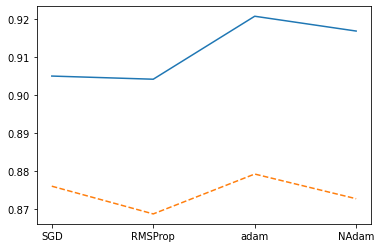

In [92]:
plt.plot(results['optim'], results['train_acc'], '-', label = f'Train')
plt.plot(results['optim'], results['test_acc'], '--', label = f'Test')

#### Лучше всего работает оптимизация adam

### 3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

#### Наилучшие результаты получены при малом числе слоев, среднем числе нейронов и оптимизации Adam.

### 4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [128]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report

In [176]:
y_pred = modeli.predict(test_images)
y_pred_class = np.argmax(y_pred,axis=1)

In [177]:
y_pred_class

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [171]:
multilabel_confusion_matrix(test_labelf, y_pred_class, labels = list(set(test_labelf)))

array([[[8855,  145],
        [ 243,  757]],

       [[8996,    4],
        [  38,  962]],

       [[8835,  165],
        [ 233,  767]],

       [[8891,  109],
        [ 111,  889]],

       [[8823,  177],
        [ 208,  792]],

       [[8909,   91],
        [  33,  967]],

       [[8562,  438],
        [ 244,  756]],

       [[8933,   67],
        [  68,  932]],

       [[8964,   36],
        [  43,  957]],

       [[8960,   40],
        [  51,  949]]], dtype=int64)

In [174]:
print(classification_report(test_labelf, y_pred_class, target_names=classes))

                    precision    recall  f1-score   support

      футболки (0)       0.84      0.76      0.80      1000
         штаны (1)       1.00      0.96      0.98      1000
       свитеры (2)       0.82      0.77      0.79      1000
        платья (3)       0.89      0.89      0.89      1000
верхняя одежда (4)       0.82      0.79      0.80      1000
     босоножки (5)       0.91      0.97      0.94      1000
       рубашки (6)       0.63      0.76      0.69      1000
     кроссовки (7)       0.93      0.93      0.93      1000
         сумки (8)       0.96      0.96      0.96      1000
  зимняя обувь (9)       0.96      0.95      0.95      1000

          accuracy                           0.87     10000
         macro avg       0.88      0.87      0.87     10000
      weighted avg       0.88      0.87      0.87     10000



### Модель показала достаточно хорошие результаты в среднем, однако заметно, что классификация определенных классов (1, 3, 5, 7, 8, 9) удалась ей лучше, о чем говорят обе метрики (precision, recall), а также f1-score. С классом 6 возникло больше всего проблем - по нему достаточно низкая метрика точности (0.63), что свидетельствует о высоком значении FP.

Посмотрим на самый проблемный класс глазами.

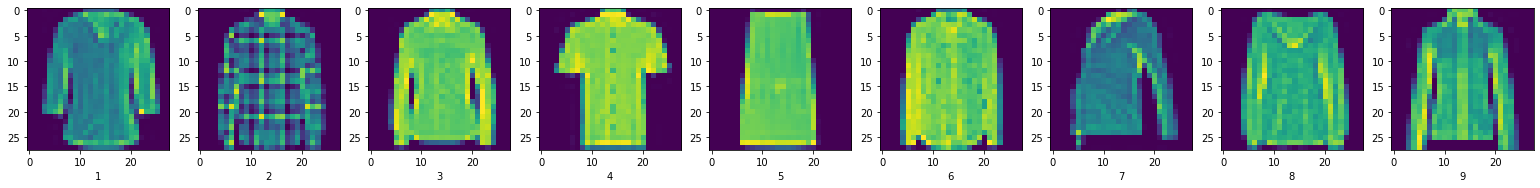

In [199]:
N = 9
y_pred_class_6 = np.where(y_pred_class == 6)[0][:N]
plt.figure(figsize =(3*N,5))
for idx, i in enumerate(y_pred_class_6):
    plt.subplot(1,N,idx+1)
    plt.imshow(test_images[i].reshape(28,28))
    plt.xlabel(idx + 1)
plt.show()  

#### Видно, что некоторые объекты распознаны неправильно (5, 8 и, возможно, 7), однако их распознавание и человеком достаточно затруднено.